<a href="https://colab.research.google.com/github/Iam-whizzy/DataScience/blob/main/clusteringUnsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
  # Customer Segmentation using K-Means algorithm
  # Unsupervised
  # Customer Segmentation: Group customers with similar characteristics for informed decision making
  # Read Data

import pandas
data = pandas.read_csv("https://modcom.co.ke/datasets/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,NaN
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [20]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,199.000000,197.000000
mean,100.500000,38.850000,60.356784,50.324873
std,57.879185,13.969007,26.172859,25.639097
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.000000,35.000000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
data.corr()

<ipython-input-21-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerID,Age,Annual Income,Spending Score
CustomerID,1.000000,-0.026763,0.977283,0.028493
Age,-0.026763,1.000000,-0.006406,-0.331341
Annual Income,0.977283,-0.006406,1.000000,0.028008
Spending Score,0.028493,-0.331341,0.028008,1.000000


In [22]:
# check empties
data.isnull().sum()

CustomerID        0
Gender            4
Age               0
Annual Income     1
Spending Score    3
dtype: int64

In [23]:
#Remove Empties

data['Gender'].fillna('Unknown', inplace = True)
mean_income = data['Annual Income'].mean()
mean_spending = data['Spending Score'].mean()

data['Annual Income'].fillna(mean_income, inplace = True)
data['Spending Score'].fillna(mean_spending, inplace = True)


In [24]:
# Machine Learning - Clustering
# Step 1: Pick the column of interest
array = data.values
X = array[:,2:5]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

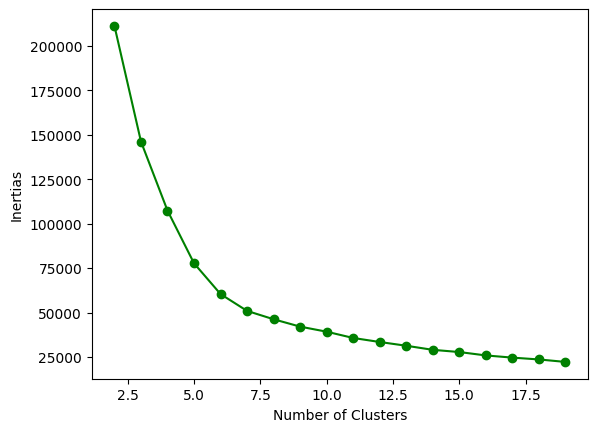

In [25]:
#  Elbow
# Inertia
from sklearn.cluster import KMeans
inertias = []
#we don't do 1 since everyone will be in their own clusters
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,20), inertias, "o-g")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias")
plt.show()

In [26]:
# Step 2:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, random_state=42)
clusters = model.fit(X)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [27]:
# Step3: Get the cluster centers(Centronoids) and Convert them to a DataFrame
centronoids = model.cluster_centers_
centronoids

array([[ 41.        , 109.7       ,  28.46497462],
       [ 25.27272727,  25.72727273,  79.36363636],
       [ 32.9       , 108.9       ,  84.2       ],
       [ 56.15555556,  53.37777778,  49.08888889],
       [ 44.14285714,  25.14285714,  19.52380952],
       [ 41.96      ,  79.64      ,  15.4       ],
       [ 32.74074074,  78.03703704,  81.59259259],
       [ 27.2       ,  57.2839196 ,  49.63312183]])

In [28]:
#on DataFrame
clusters = pandas.DataFrame(centronoids, columns = ['Age', 'Annual Income', 'Spending Score'])
clusters

,Age,Annual Income,Spending Score
0,41.000000,109.700000,28.464975
1,25.272727,25.727273,79.363636
2,32.900000,108.900000,84.200000
3,56.155556,53.377778,49.088889
4,44.142857,25.142857,19.523810
5,41.960000,79.640000,15.400000
6,32.740741,78.037037,81.592593
7,27.200000,57.283920,49.633122


In [29]:
# Step 4: Generating Cluster Members from a Group

data['Group'] = model.labels_
data

,CustomerID,Gender,Age,Annual Income,Spending Score,Group
0,1,Male,19,15.0,39.000000,4
1,2,Male,21,15.0,81.000000,1
2,3,Female,20,16.0,6.000000,4
3,4,Female,23,16.0,77.000000,1
4,5,Female,31,17.0,40.000000,4
...,...,...,...,...,...,...
195,196,Female,35,120.0,79.000000,2
196,197,Female,45,126.0,50.324873,0
197,198,Male,32,126.0,74.000000,2
198,199,Male,32,137.0,18.000000,0


In [30]:
# Members of the same Group
# Group 1 members - grouping members by group
# Converting to csv members with same characteristics

group1 = data[data['Group'] ==1 ]
group1.to_csv('group1.csv')

#Read group 1
group1_data = pandas.read_csv("group1.csv")
group1_data


,Unnamed: 0,CustomerID,Gender,Age,Annual Income,Spending Score,Group
0,1,2,Male,21,15.0,81.0,1
1,3,4,Female,23,16.0,77.0,1
2,5,6,Female,22,17.0,76.0,1
3,7,8,Female,23,18.0,94.0,1
4,9,10,Female,30,19.0,72.0,1
5,11,12,Female,35,19.0,99.0,1
6,13,14,Female,24,20.0,77.0,1
7,15,16,Male,22,20.0,79.0,1
8,17,18,Male,20,21.0,66.0,1
9,19,20,Female,35,23.0,98.0,1


In [31]:
# Generating group 4

group4 = data[data['Group'] ==4 ]
group4.to_csv('group4.csv')

#Read group 4
group4_data = pandas.read_csv("group4.csv")
group4_data


,Unnamed: 0,CustomerID,Gender,Age,Annual Income,Spending Score,Group
0,0,1,Male,19,15.0,39.0,4
1,2,3,Female,20,16.0,6.0,4
2,4,5,Female,31,17.0,40.0,4
3,6,7,Female,35,18.0,6.0,4
4,8,9,Male,64,19.0,3.0,4
5,10,11,Male,67,19.0,14.0,4
6,12,13,Female,58,20.0,15.0,4
7,14,15,Male,37,20.0,13.0,4
8,16,17,Female,35,21.0,35.0,4
9,18,19,Male,52,23.0,29.0,4
